In [ ]:
import numpy as np
import tensorflow as tf
import pandas as pd
pd.options.mode.chained_assignment = None
import seaborn as sns
from matplotlib.pylab import rcParams
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go

%matplotlib inline

sns.set(style='whitegrid', palette='muted')
rcParams['figure.figsize'] = 14, 8
np.random.seed(1)
tf.random.set_seed(1)



In [ ]:
from google.colab import drive
drive.mount('/content/drive')

#Loading the Dataset
data_train = pd.read_csv('/content/drive/My Drive/DataAnalytics/project/tr.csv', parse_dates=True, index_col="date")
data_test = pd.read_csv('/content/drive/My Drive/DataAnalytics/project/te.csv', parse_dates=True, index_col="date")

data_train = data_train.drop(columns=['X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8', 'X9', 'X10', 'X11', 'X12', 'X13', 'X14', 'X15', 'X16', 'X17', 'X18', 'X19', 'X1'])
data_test = data_test.drop(columns=['X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8', 'X9', 'X10', 'X11', 'X12', 'X13', 'X14', 'X15', 'X16', 'X17', 'X18', 'X19', 'X1'])


Mounted at /content/drive


In [ ]:
print (data_train.shape, data_test.shape)

(496800, 1) (123393, 1)


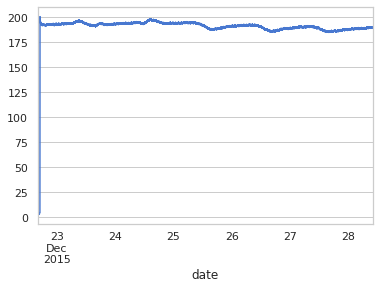

In [ ]:
#lets plot train dataset
from matplotlib import pyplot as plt
fig, ax = plt.subplots()
data_train.plot(legend=False, ax=ax)
plt.show()

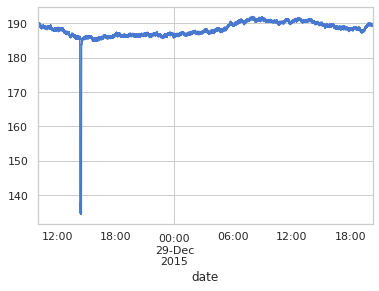

In [ ]:
#lets plot test dataset
from matplotlib import pyplot as plt
fig, ax = plt.subplots()
data_test.plot(legend=False, ax=ax)
plt.show()

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler = scaler.fit(data_train[['X20']])
data_train['X20'] = scaler.transform(data_train[['X20']])
data_test['X20'] = scaler.transform(data_test[['X20']])

In [ ]:

def create_sequences(X, Y, time_steps=1):
    sampleX, sampleY = [], []
    for i in range(len(X) - time_steps):
        sampleX.append(X.iloc[i:(i+time_steps)].values)
        sampleY.append(Y.iloc[i + time_steps])
    
    return np.array(sampleX), np.array(sampleY)

In [ ]:
time_steps = 1

training_X, training_Y = create_sequences(data_train[['X20']], data_train.X20, time_steps)
testing_X, testing_Y = create_sequences(data_test[['X20']], data_test.X20, time_steps)

print(training_X.shape, testing_X.shape)

(496799, 1, 1) (123392, 1, 1)


In [ ]:
import numpy.ma as ma
#np.where(np.isnan(training_X), ma.array(training_X, mask=np.isnan(training_X)).mean(axis=0), training_X)    
##np.where(np.isnan(training_Y), ma.array(training_Y, mask=np.isnan(training_Y)).mean(axis=0), training_Y)    
#np.where(np.isnan(testing_X), ma.array(testing_X, mask=np.isnan(testing_X)).mean(axis=0), testing_X) 
#np.where(np.isnan(testing_Y), ma.array(testing_Y, mask=np.isnan(testing_Y)).mean(axis=0), testing_Y) 

In [ ]:
timesteps = training_X.shape[1] # 30
nfeatures = training_X.shape[2] # 1

print('timesteps: {}, features:{}'.format(timesteps,nfeatures))

timesteps: 1, features:1


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout, RepeatVector, TimeDistributed
model = Sequential([
    LSTM(128, input_shape=(timesteps , nfeatures)), Dropout(0.2), RepeatVector(timesteps), LSTM(128, return_sequences=True), Dropout(0.2),
    TimeDistributed(Dense(nfeatures))   
])
model.compile(loss='mae', optimizer='adam')
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 128)               66560     
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 repeat_vector (RepeatVector  (None, 1, 128)           0         
 )                                                               
                                                                 
 lstm_1 (LSTM)               (None, 1, 128)            131584    
                                                                 
 dropout_1 (Dropout)         (None, 1, 128)            0         
                                                                 
 time_distributed (TimeDistr  (None, 1, 1)             129       
 ibuted)                                                

In [ ]:
history = model.fit(
    training_X, 
    training_Y, 
    epochs=10, 
    batch_size=32, 
    validation_split=0.1, 
    #callbacks=[tf.keras.callbacks.EarlyStopping(monitor='val_loss', mode='min')],
    shuffle=False
)

Epoch 1/10
13973/13973 [==============================] - 69s 5ms/step - loss: 0.0437 - val_loss: 0.0996
Epoch 2/10
13973/13973 [==============================] - 67s 5ms/step - loss: 0.0324 - val_loss: 0.1031
Epoch 3/10
13973/13973 [==============================] - 67s 5ms/step - loss: 0.0252 - val_loss: 0.1062
Epoch 4/10
13973/13973 [==============================] - 68s 5ms/step - loss: 0.0234 - val_loss: 0.0995
Epoch 5/10
13973/13973 [==============================] - 66s 5ms/step - loss: 0.0228 - val_loss: 0.0935
Epoch 6/10
13973/13973 [==============================] - 65s 5ms/step - loss: 0.0222 - val_loss: 0.0913
Epoch 7/10
13973/13973 [==============================] - 67s 5ms/step - loss: 0.0212 - val_loss: 0.0886
Epoch 8/10
13973/13973 [==============================] - 67s 5ms/step - loss: 0.0218 - val_loss: 0.0857
Epoch 9/10
13973/13973 [==============================] - 66s 5ms/step - loss: 0.0210 - val_loss: 0.0821
Epoch 10/10
13973/13973 [==============================

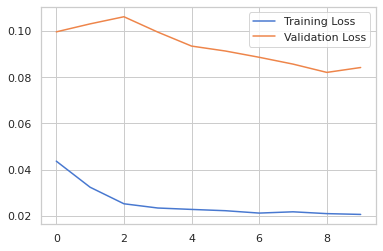

In [ ]:
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()

In [ ]:
 X_train_pred= model.predict(training_X)

#predict training data

In [ ]:
#train_mae
#np.where(np.isnan(X_train_pred), ma.array(X_train_pred, mask=np.isnan(X_train_pred)).mean(axis=0), X_train_pred)    


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


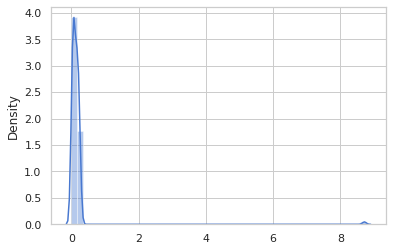

In [ ]:
train_mae = np.mean(np.abs(X_train_pred, training_X), axis=1)
sns.distplot(train_mae, bins=50, kde=True)
#MAE loss for training

In [ ]:
#np.where(np.isnan(train_mae), ma.array(train_mae, mask=np.isnan(train_mae)).mean(axis=0), train_mae)    
#sns.distplot(train_mae, bins=50, kde=True)


In [ ]:
X_test_pred =  model.predict(testing_X)
#np.where(np.isnan(X_test_pred), ma.array(X_test_pred, mask=np.isnan(X_test_pred)).mean(axis=0), X_test_pred)    

test_mae = np.mean(np.abs(X_test_pred, testing_X), axis=1)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


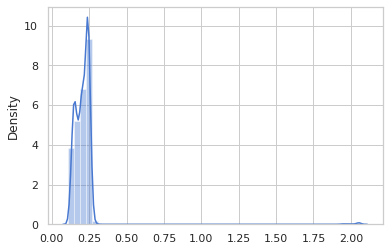

In [ ]:
sns.distplot(test_mae, bins=50, kde=True)

from sklearn.metrics import confusion_matrix


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


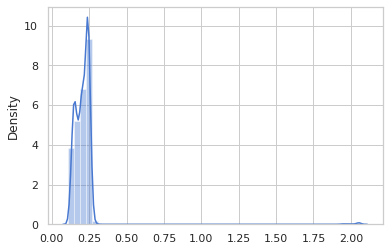

In [ ]:
np.where(np.isnan(test_mae), ma.array(test_mae, mask=np.isnan(test_mae)).mean(axis=0), test_mae)    
sns.distplot(test_mae, bins=50, kde=True)


In [ ]:

score = pd.DataFrame(data_test[time_steps:])
score['loss'] = test_mae
score['loss2'] = test_mae*test_mae
#z=0.7
#testmse = np.mean(score.loss2) + z*np.std(score.loss2)
MSE_tr = np.square(np.subtract(training_X,X_train_pred)).mean()

threshold = 0.2527 #MSE_tr #train_mae_loss.max()
score['threshold'] = threshold
score['anomaly'] = (score.loss > score.threshold).astype(int)
#score['anomaly2'] = (score.loss2 > score.threshold).astype(int)

score['X21'] = data_test[time_steps:].X20
print('threshold:',format(threshold))
outppt=score[['anomaly']]
score

#outppt.to_csv('/content/drive/My Drive/DataAnalytics/project/may1may2.csv')

threshold: 0.2527


,X20,loss,loss2,threshold,anomaly,X21
date,,,,,,
2015-12-28 10:00:01,-0.038765,0.177262,0.031422,0.2527,0,-0.038765
2015-12-28 10:00:02,-0.038765,0.175300,0.030730,0.2527,0,-0.038765
2015-12-28 10:00:03,-0.042958,0.175300,0.030730,0.2527,0,-0.042958
2015-12-28 10:00:04,-0.050292,0.176871,0.031283,0.2527,0,-0.050292
2015-12-28 10:00:05,-0.050292,0.179596,0.032255,0.2527,0,-0.050292
...,...,...,...,...,...,...
2015-12-29 20:16:28,-0.060772,0.183438,0.033650,0.2527,0,-0.060772
2015-12-29 20:16:29,-0.060772,0.183438,0.033650,0.2527,0,-0.060772
2015-12-29 20:16:30,-0.042958,0.183438,0.033650,0.2527,0,-0.042958


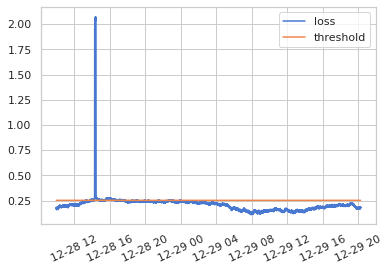

In [ ]:
plt.plot(score.index, score.loss, label='loss')
plt.plot(score.index, score.threshold, label='threshold')
plt.legend()

In [ ]:
anomalies = score[score.anomaly==True]
len(anomalies)


10711

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


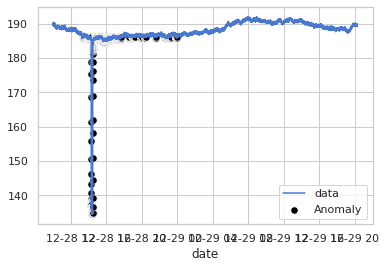

In [ ]:
plt.plot(
    data_test[time_steps:].index,
    scaler.inverse_transform(data_test[time_steps:].X20.values.reshape(1,-1)).reshape(-1),
    label='data'           
)
sns.scatterplot(
    anomalies.index, scaler.inverse_transform(anomalies.X20.values.reshape(1,-1)).reshape(-1),
    s=52,
    label='Anomaly',
    color='black'
)
plt.legend()

In [ ]:
import numpy.ma as ma
np.where(np.isnan(X_test_pred), ma.array(X_test_pred, mask=np.isnan(X_test_pred)).mean(axis=0), X_test_pred)    
np.where(np.isnan(X_train_pred), ma.array(X_train_pred, mask=np.isnan(X_train_pred)).mean(axis=0), X_train_pred)    
np.where(np.isnan(testing_X), ma.array(testing_X, mask=np.isnan(testing_X)).mean(axis=0), testing_X)    


array([[[0.17726175]],

       [[0.17529972]],

       [[0.17529972]],

       ...,

       [[0.18343826]],

       [[0.17687105]],

       [[0.17687105]]])

In [ ]:
test_acc=model.evaluate(testing_X, testing_Y)
train_acc=model.evaluate(training_X, training_Y)
print(test_acc,train_acc)

15525/15525 [==============================] - 28s 2ms/step - loss: 0.3248
nan 0.3247881233692169


In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score, accuracy_score, roc_curve, auc
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn import metrics

predicted = X_test_pred[:, -1].astype(int)
actual = testing_X[:, -1].astype(int)
cp = confusion_matrix(actual, predicted)
tp, fn, fp, tn = confusion_matrix(actual,predicted,labels=[1,0]).reshape(-1)
print('tp, fn, fp, tn: \n', tp, fn, fp, tn)
aaa = accuracy_score(actual,predicted)
print('\naccuracy')
print(aaa)
pree = precision_score(actual,predicted,average=None)
print('\nprecision')
print(pree)
recal = recall_score(actual,predicted,average=None)
print('\nrecall')
print(recal)
f1 = f1_score(actual, predicted, average=None)
print('\nf1')
print(f1)

fpr, tpr, thresholds = metrics.roc_curve(actual, predicted, pos_label=1)
print('\n fpr, tpr, thresholds\n',fpr,'\n', tpr,'\n', thresholds)
print('\n')


tp, fn, fp, tn: 
 0 0 0 122831

accuracy
0.9954535140041494

precision
[0. 0. 1. 0. 0.]

recall
[0. 0. 1. 0. 0.]

f1
[0. 0. 1. 0. 0.]

 fpr, tpr, thresholds
 [0.         0.99669745 0.99669745 1.        ] 
 [0. 0. 1. 1.] 
 [ 1  0 -1 -2]




/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [1]:
#roc_auc_score(testing_Y, X_test_pred[:,0:1])

